In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

In [7]:
df_1 = pd.read_csv ("CRC1307-09-1-B.all_common_results.csv")
print (df_1)

df_2 = pd.read_csv ("CRC1307-02-1-E.all_common_results.csv")
print (df_2)

   extant         p_hat        min_mu        max_mu
0       8  0.000000e+00 -0.000000e+00 -0.000000e+00
1      12  2.914530e-08  3.070730e-10  1.352810e-09
2      16  5.829070e-08  4.506760e-10  1.990320e-09
3      20  8.937900e-08  5.457680e-10  2.413690e-09
4      24  1.126950e-07  5.686100e-10  2.517050e-09
5      28  1.398980e-07  6.013960e-10  2.663920e-09
6      32  1.826440e-07  6.839360e-10  3.031010e-09
7      48  3.847180e-07  9.504940e-10  4.217020e-09
8      75  7.830380e-07  1.228990e-09  5.456930e-09
9     100  2.080980e-06  2.441580e-09  1.084480e-08
   extant         p_hat        min_mu        max_mu
0       8  3.886040e-09  6.424640e-11  2.815680e-10
1      12  5.051860e-08  5.322590e-10  2.344870e-09
2      16  7.772090e-08  6.009020e-10  2.653750e-09
3      20  1.165810e-07  7.118710e-10  3.148290e-09
4      24  1.398980e-07  7.058610e-10  3.124610e-09
5      28  1.496130e-07  6.431600e-10  2.848910e-09
6      32  1.671000e-07  6.257290e-10  2.773050e-09
7      48  2

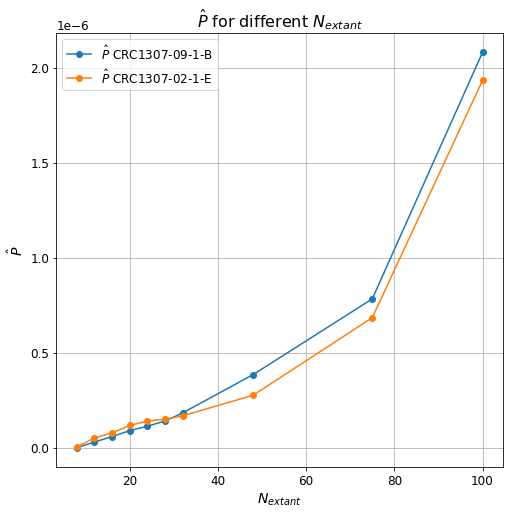

In [18]:
p_hat_1 = [x for x in df_1["p_hat"]]

extant = [x for x in df_1["extant"]]

min_mu_1 = [x for x in df_1["min_mu"]]
max_mu_1 = [x for x in df_1["max_mu"]]

p_hat_2 = [x for x in df_2["p_hat"]]

min_mu_2 = [x for x in df_2["min_mu"]]
max_mu_2 = [x for x in df_2["max_mu"]]



fig = plt.figure(figsize=(8,8))

ax = plt.gca()
ax.plot(extant, p_hat_1, marker = "o", label = r'$\hat P $ CRC1307-09-1-B')
ax.plot(extant, p_hat_2, marker = "o", label = r'$\hat P $ CRC1307-02-1-E')

ax.grid()
ax.set_title(r'$\hatP$ for different $N_{extant}$')
ax.set_xlabel(r'$N_{extant}$')
ax.set_ylabel(r'$\hatP$')
#ax.set_yscale('log')
ax.legend()
plt.savefig("p_hat.svg")



In [9]:
mu_1 = [0.5*(min_mu_1[i]+max_mu_1[i]) for i in range(len(min_mu_1))]
mu_ybar_1 = [max_mu_1[i] - mu_1[i] for i in range(len(min_mu_1))]

mu_2 = [0.5*(min_mu_2[i]+max_mu_2[i]) for i in range(len(min_mu_2))]
mu_ybar_2 = [max_mu_2[i] - mu_2[i] for i in range(len(min_mu_2))]

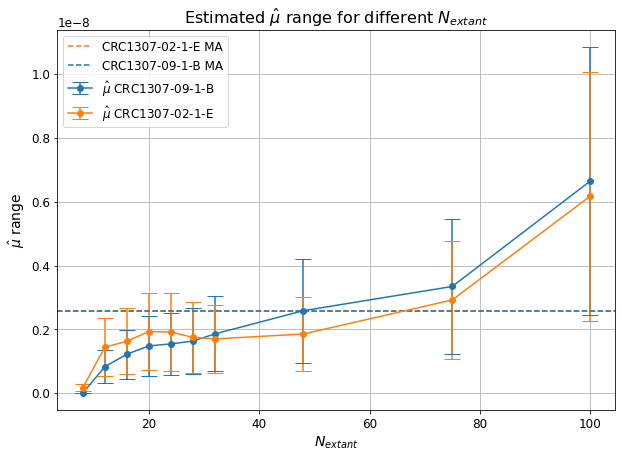

In [19]:
fig = plt.figure(figsize=(10,7))
ax = plt.gca()
ax.errorbar(extant, mu_1, yerr=mu_ybar_1, capsize=8, marker = "o", label = r'$\hat \mu$ CRC1307-09-1-B')
ax.errorbar(extant, mu_2, yerr=mu_ybar_2, capsize=8, marker = "o", label = r'$\hat \mu$ CRC1307-02-1-E')
ax.axhline(y= 2.56764427616427e-09, ls = "--", c='tab:orange', label = 'CRC1307-02-1-E MA')
ax.axhline(y= 2.58348628545268e-09, ls = "--", c='tab:blue', label = 'CRC1307-09-1-B MA')

#ax.set_yscale('log')

ax.grid()

ax.set_title(r'Estimated $\hat\mu$ range for different $N_{extant}$')
ax.set_xlabel(r'$N_{extant}$')
ax.set_ylabel(r'$\hat \mu$ range')
ax.legend()

plt.savefig("estimated_mu.svg")
